In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [3]:
df_v1 = pd.read_csv("../GA_1/rf_ann_fixed/quick_analysis_data_ensemble_rf_ann.csv", index_col=False)
df_v2 = pd.read_csv("../GA_2/quick_analysis_data_GA2.csv", index_col=False)
df_v3 = pd.read_csv("../GA_3/quick_analysis_data_GA3.csv", index_col=False)
df_v4 = pd.read_csv("../GA_4/quick_analysis_data_GA4.csv", index_col=False)

In [2]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

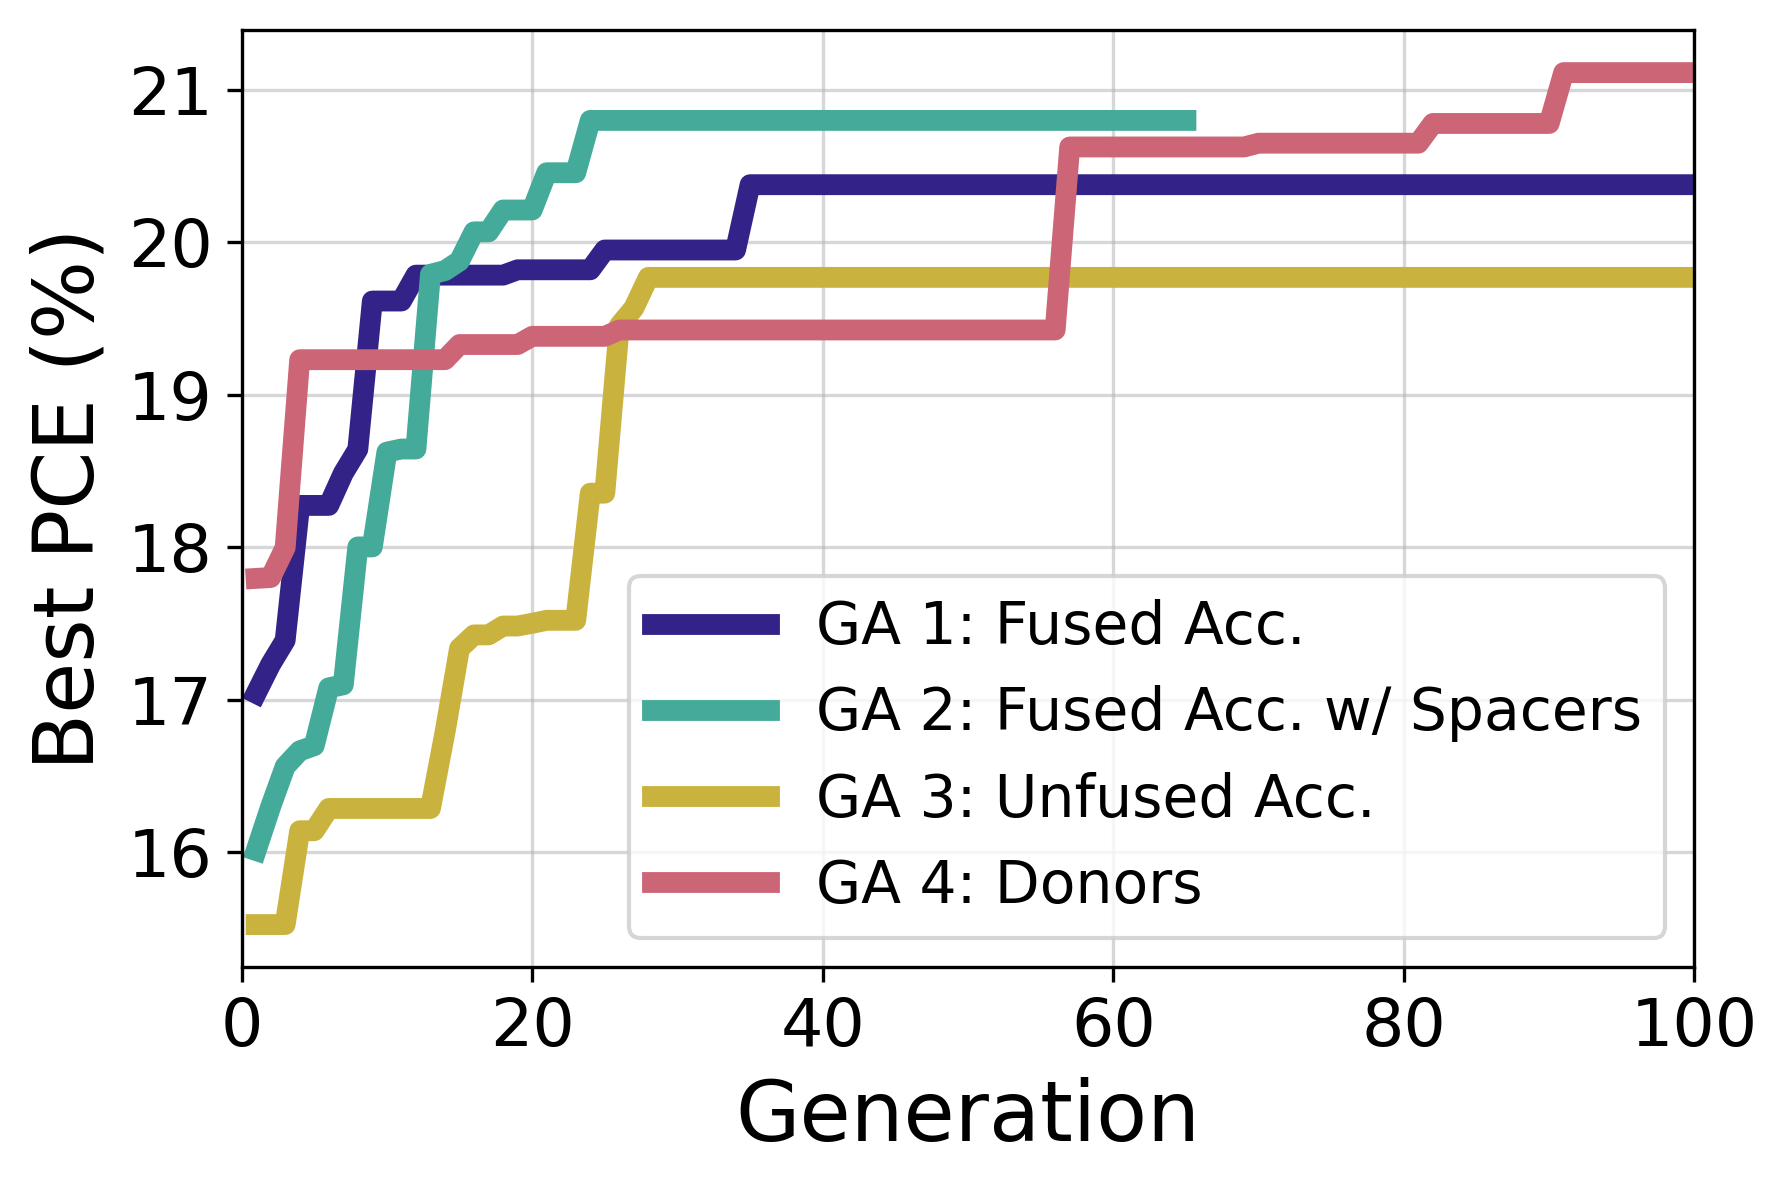

In [6]:
fig, ax1 = plt.subplots(dpi=300)

#ylim_p = (15, 25)
#yticks_p = [10, 15, 20, 25]

# Version 1
'''ax1.plot('gen', 'max_PCE', data=df_v1, linestyle='', marker='o', markersize=8, color='#332288')
ax1.plot('gen', 'max_PCE', data=df_v2, linestyle='', marker='o', markersize=8, color='#44AA99')
ax1.plot('gen', 'max_PCE', data=df_v3, linestyle='', marker='o', markersize=8, color='#CAB23F')
ax1.plot('gen', 'max_PCE', data=df_v4, linestyle='', marker='o', markersize=8, color='#CC6677')'''

ax1.plot('gen', 'max_PCE', data=df_v1, linestyle='solid', color='#332288', linewidth=5)
ax1.plot('gen', 'max_PCE', data=df_v2, linestyle='solid',color='#44AA99', linewidth=5)
ax1.plot('gen', 'max_PCE', data=df_v3, linestyle='solid', color='#CAB23F', linewidth=5)
ax1.plot('gen', 'max_PCE', data=df_v4, linestyle='solid', color='#CC6677', linewidth=5)


ax1.set_ylabel('Best PCE (%)', fontsize=20)
#ax1.set(ylim=ylim_p, )
#ax1.set_yticks(yticks_p)
#ax1.set_yticklabels(yticks_p, fontsize=16)
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)

ax1.set(xlim=(0, 100))

ax1.set_xlabel('Generation', fontsize=20)
ax1.grid(alpha=0.5)
ax1.set_axisbelow(True)

#plt.legend(["sTD-DFT", 'sTDA', 'sTD-DFT-xTB', 'sTDA-xTB', 'GFN2-xTB'], fontsize=14)
plt.legend(["GA 1: Fused Acc.", "GA 2: Fused Acc. w/ Spacers", "GA 3: Unfused Acc.", "GA 4: Donors"], fontsize=14)


plt.tight_layout()

plt.savefig('pce_convergence_plots_GA1234.pdf', dpi=600)
plt.savefig('pce_convergence_plots_GA1234.png', dpi=600)



# Tandem Cells

In [21]:
def plot_tandem_conv(df, savefig_filename):

    fig, ((ax1), (ax2), (ax3)) = plt.subplots(3, 1, sharex=True, dpi=300)

    # set figure axes
    xlimits = (0, 500)
    xticks_gen = [0, 100, 200, 300, 400, 500]

    # PCE y axis
    ylim_p = (225, 500)
    yticks_p = [250, 350, 450]

    # deltaHOMO y axis
    ylim_h = (400, 1200)
    yticks_h =[400, 800, 1200]

    # summedoscs y axis
    ylim_s = (100, 750)
    yticks_s =[100, 400, 700]

    ax1.plot('gen', 'max_score', data=df, linestyle='', marker='o', markersize=2, color='#882255')
    ax1.set_ylabel('Best Score', fontsize=8)
    ax1.set(ylim=ylim_p, xlim=xlimits)
    ax1.set_yticks(yticks_p)

    ax1.set_xticks(xticks_gen)
    ax1.grid(alpha=0.5)
    ax1.set_axisbelow(True)

    #for tic in ax1.xaxis.get_major_ticks():
        #tic.tick1On = tic.tick2On = False

    ax2.plot('gen', 'max_abs', data=df, linestyle='', marker='o', markersize=2,color='#44AA99')
    ax2.set_ylabel('Area\n of Absorption', fontsize=8)
    ax2.set(ylim=ylim_h, xlim=xlimits)
    ax2.set_yticks(yticks_h)

    ax2.set_xticks(xticks_gen)
    ax2.grid(alpha=0.5)
    ax2.set_axisbelow(True)

    #for tic in ax2.xaxis.get_major_ticks():
        #tic.tick1On = tic.tick2On = False

    ax3.plot('gen', 'max_overlap', data=df, linestyle='', marker='o', markersize=2,color='#44AA99')
    ax3.set_ylabel('Area\n of Overlap', fontsize=8)
    ax3.set(ylim=ylim_s, xlim=xlimits)
    ax3.set_yticks(yticks_s)
    ax3.set_xlabel('Generation', fontsize=8)

    ax3.set_xticks(xticks_gen)
    ax3.grid(alpha=0.5)
    ax3.set_axisbelow(True)


    top = 0.75
    bottom = 0.12
    midpoint = (top+bottom)/2

    left = 0.11
    right = 0.35

    #fig.text((left+right)/2, 0.02,'Generation', ha='center')

    plt.subplots_adjust(top=top, bottom=bottom, left=left, right=right, hspace=0.3)

    plt.savefig(savefig_filename + '.pdf', transparent=False, bbox_inches='tight')
    plt.savefig(savefig_filename + '.png', transparent=False, bbox_inches='tight')

    plt.show()

## GA 5

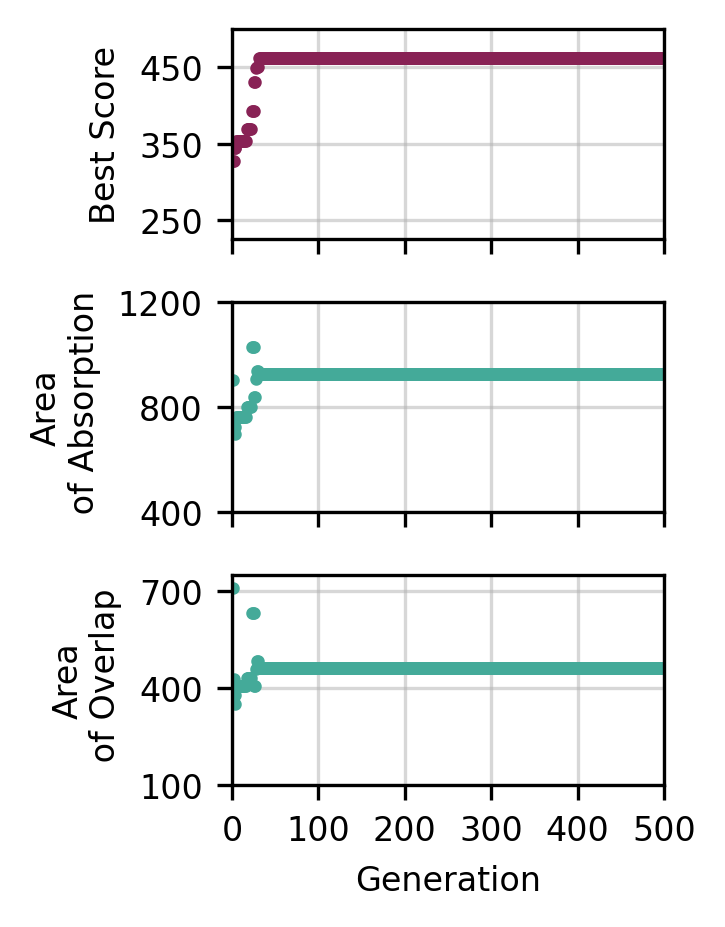

In [22]:
df_v5 = pd.read_csv("../GA_5/quick_analysis_data_GA5_smear08.csv", index_col=False)
plot_tandem_conv(df_v5, '../GA567/convergence_GA5')

## GA 6

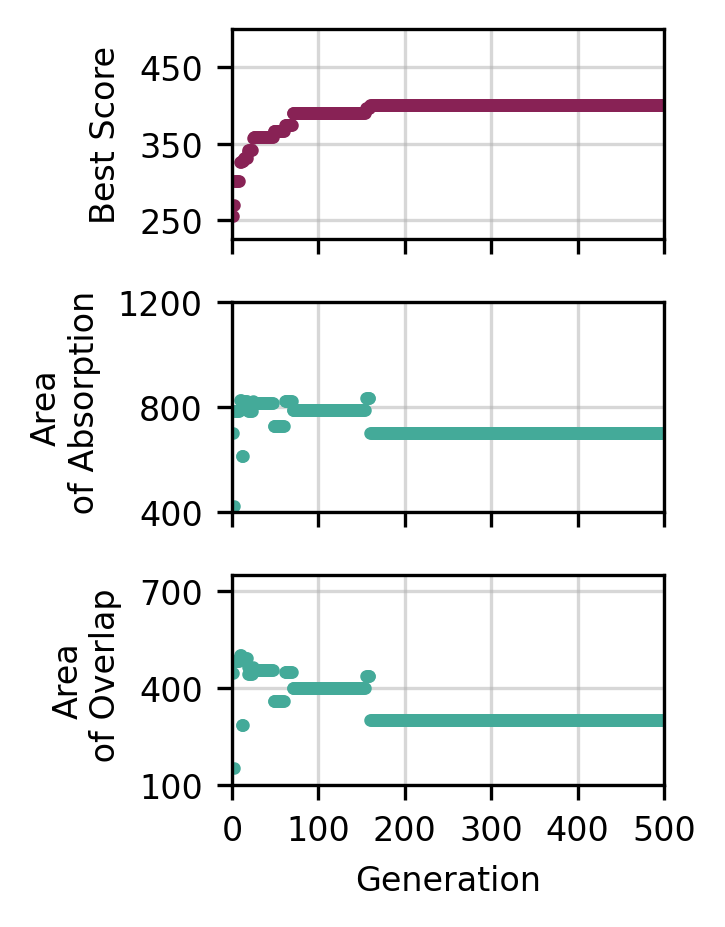

In [23]:
df_v6 = pd.read_csv("../GA_6/quick_analysis_data_GA6.csv", index_col=False)
plot_tandem_conv(df_v6, '../GA567/convergence_GA6')

## GA 7

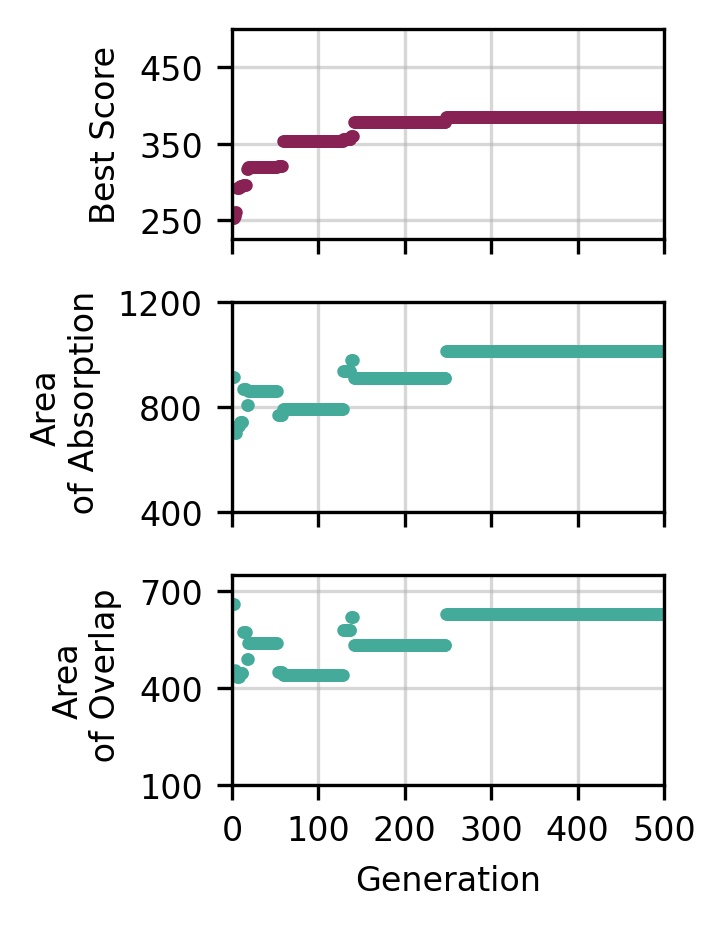

In [24]:
df_v7 = pd.read_csv("../GA_7/quick_analysis_data_GA7.csv", index_col=False)
plot_tandem_conv(df_v7, '../GA567/convergence_GA7')

# GA 5 with different smears in absorption spectrum

NameError: name 'xticks' is not defined

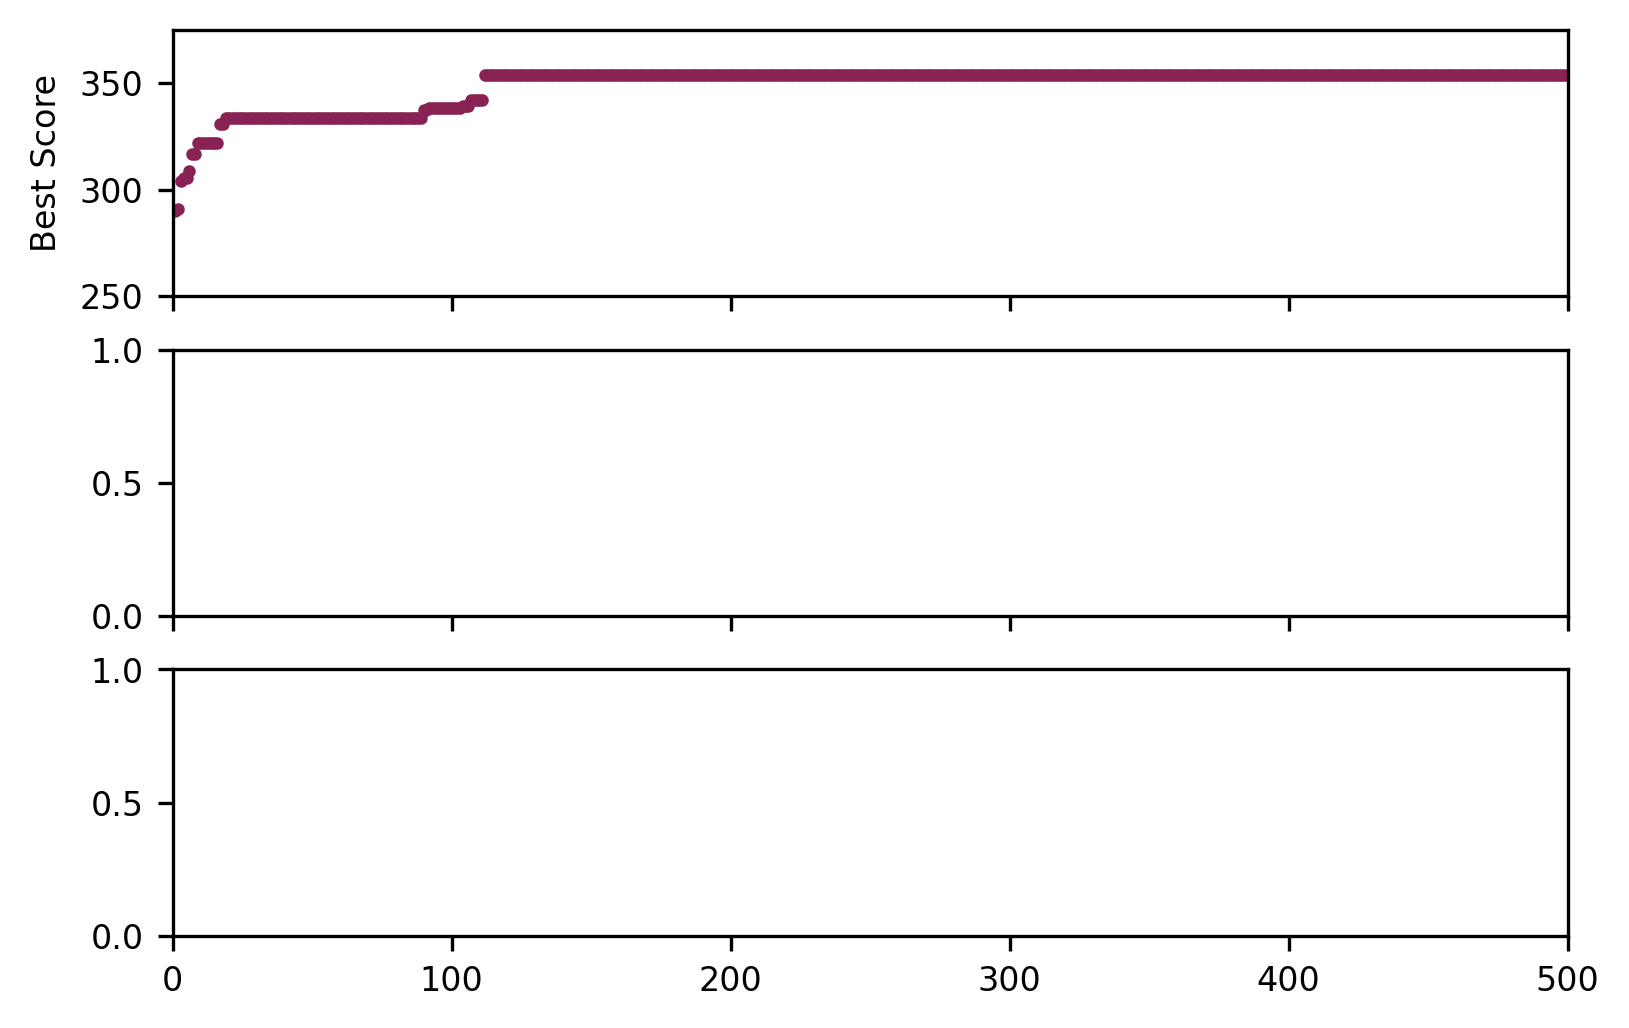

In [5]:
df_v6 = pd.read_csv("../GA_5/quick_analysis_data_GA5_smear04.csv", index_col=False)
plot_tandem_conv(df_v6, '../GA567/convergence_GA5_smear04')